In [1]:
library(data.table)
library(dplyr)
library(ggplot2)
library(ggpubr)
theme_set(theme_bw())

generate_ranks <- function(checkm_out, bin) {
    checkm_out[`Bin Id` %like% bin, binner:=bin]
    checkm_out[`Bin Id` %like% bin & Completeness >= 50 & Contamination <= 10, com_rank := frank(checkm_out[`Bin Id` %like% bin & Completeness >= 50 & Contamination <= 10], -Completeness, Contamination)]
    checkm_out[`Bin Id` %like% bin & Completeness >= 50 & Contamination <= 10, con_rank := frank(checkm_out[`Bin Id` %like% bin & Completeness >= 50 & Contamination <= 10], Contamination, -Completeness)]
}

generate_ranks_das <- function(checkm_out, bin) {
    checkm_out[, binner := bin]
    checkm_out[Completeness >= 50 & Contamination <= 10, com_rank := frank(checkm_out[Completeness >= 50 & Contamination <= 10], -Completeness, Contamination)]
    checkm_out[Completeness >= 50 & Contamination <= 10, con_rank := frank(checkm_out[Completeness >= 50 & Contamination <= 10], Contamination, -Completeness)]    
}


Attaching package: ‘dplyr’

The following objects are masked from ‘package:data.table’:

    between, first, last

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [2]:
# Current Best: rosella bin --input coverm.cov --assembly ../../assembly/scaffolds.fasta --min_cluster_size 10 --min_bin_size 100000 --min_contig_size 2500 --n_neighbors 100 --n_components 2 --output 00-rosella_bins --scaler clr --threads 128 --min_samples 1 --metric rho
# 90/05: /
# 90/10: /
# 70/10: /
rosella_03 <- fread('/lustre/scratch/microbiome/n10853499/99-STRONG_sim/Synth_G45_S03D/binning/data/00-rosella_bins/checkm.out')
das_tool_03 <- fread('/lustre/scratch/microbiome/n10853499/99-STRONG_sim/Synth_G45_S03D/binning/data/checkm.out')
all_bins_03 <- fread('/lustre/scratch/microbiome/n10853499/99-STRONG_sim/Synth_G45_S03D/binning/data/all_bins/checkm.out')

# Current Best: rosella.py fit --input coverm.cov --assembly ../../assembly/scaffolds.fasta --min_cluster_size 10 --min_bin_size 10000 --min_contig_size 1000 --n_neighbors 30 --min_dist 0.1 --n_components 3 --output 00-rosella_bins --scaler clr --threads 128 --min_samples 1
# 90/05: 36
# 90/10: 38
# 70/10: 44
rosella_05 <- fread('/lustre/scratch/microbiome/n10853499/99-STRONG_sim/Synth_G45_S05D/binning/data/00-rosella_bins/checkm.out')
das_tool_05 <- fread('/lustre/scratch/microbiome/n10853499/99-STRONG_sim/Synth_G45_S05D/binning/data/checkm.out')
all_bins_05 <- fread('/lustre/scratch/microbiome/n10853499/99-STRONG_sim/Synth_G45_S05D/binning/data/all_bins/checkm.out')

# Current Best: --n-neighbors 100 --b-tail 0.25
# 90/05: 41
# 90/10: 41
# 70/10: 43
rosella_10 <- fread('/lustre/scratch/microbiome/n10853499/99-STRONG_sim/Synth_G45_S10D/binning/data_rosella/00-rosella_bins/checkm.out')
das_tool_10 <- fread('/lustre/scratch/microbiome/n10853499/99-STRONG_sim/Synth_G45_S10D/binning/data_rosella/checkm.out')
all_bins_10 <- fread('/lustre/scratch/microbiome/n10853499/99-STRONG_sim/Synth_G45_S10D/binning/data_rosella/all_bins/checkm.out')

# Current Best: rosella.py fit --input coverm.cov --assembly ../../assembly/scaffolds.fasta --min_cluster_size 10 --min_bin_size 10000 --min_contig_size 1000 --n_neighbors 30 --min_dist 0.1 --n_components 3 --output 00-rosella_bins --scaler clr --threads 128 --min_samples 1
# --n-neighbors 100 --b-tail 0.25
# 90/05: 36 & 35
# 90/10: 38 & 35
# 70/10: 44 & 44
rosella_15 <- fread('/lustre/scratch/microbiome/n10853499/99-STRONG_sim/Synth_G45_S15D/binning/data_rosella/00-rosella_bins/checkm.out')
das_tool_15 <- fread('/lustre/scratch/microbiome/n10853499/99-STRONG_sim/Synth_G45_S15D/binning/data_rosella/checkm.out')
all_bins_15 <- fread('/lustre/scratch/microbiome/n10853499/99-STRONG_sim/Synth_G45_S15D/binning/data_rosella/all_bins/checkm.out')

Warning message in fread("/lustre/scratch/microbiome/n10853499/99-STRONG_sim/Synth_G45_S03D/binning/data/00-rosella_bins/checkm.out"):
“Discarded single-line footer: <<[2021-01-27 15:24:00] INFO: { Current stage: 0:00:17.930 || Total: 0:11:56.340 }>>”Warning message in fread("/lustre/scratch/microbiome/n10853499/99-STRONG_sim/Synth_G45_S03D/binning/data/all_bins/checkm.out"):
“Discarded single-line footer: <<[2021-01-06 09:58:38] INFO: { Current stage: 0:01:31.088 || Total: 0:21:55.369 }>>”Warning message in fread("/lustre/scratch/microbiome/n10853499/99-STRONG_sim/Synth_G45_S05D/binning/data/00-rosella_bins/checkm.out"):
“Discarded single-line footer: <<[2021-02-12 20:37:46] INFO: { Current stage: 0:00:20.633 || Total: 0:13:30.004 }>>”Warning message in fread("/lustre/scratch/microbiome/n10853499/99-STRONG_sim/Synth_G45_S05D/binning/data/all_bins/checkm.out"):
“Discarded single-line footer: <<[2021-01-06 10:00:28] INFO: { Current stage: 0:01:34.525 || Total: 0:21:08.645 }>>”Warning me

[1] 28

[1] 28

[1] 33

[1] 39

Bin Id,Marker lineage,# genomes,# markers,# marker sets,0,1,2,3,4,5+,Completeness,Contamination,Strain heterogeneity
rosella_bin.1,o__Rickettsiales (UID3811),63,368,234,35,329,4,0,0,0,88.59,1.28,100.00
rosella_bin.12,o__Burkholderiales (UID4000),193,427,214,34,393,0,0,0,0,88.16,0.00,0.00
rosella_bin.13,o__Lactobacillales (UID374),471,350,191,1,338,11,0,0,0,99.48,2.42,0.00
rosella_bin.14,o__Lactobacillales (UID355),490,334,183,6,328,0,0,0,0,97.54,0.00,0.00
rosella_bin.15,o__Rhodospirillales (UID3754),63,336,201,1,335,0,0,0,0,99.50,0.00,0.00
rosella_bin.16,g__Ensifer (UID3566),27,1025,322,3,1019,3,0,0,0,99.59,0.48,66.67
rosella_bin.17,f__Brucellaceae (UID3482),94,1206,241,7,1196,3,0,0,0,99.49,0.45,0.00
rosella_bin.18,g__Salinispora (UID1760),45,1031,284,8,1018,5,0,0,0,99.49,0.77,0.00
rosella_bin.19,g__Bacillus (UID864),93,711,241,2,669,39,1,0,0,99.38,3.85,2.38
rosella_bin.2,o__Burkholderiales (UID4000),193,426,213,1,424,1,0,0,0,99.53,0.23,100.00


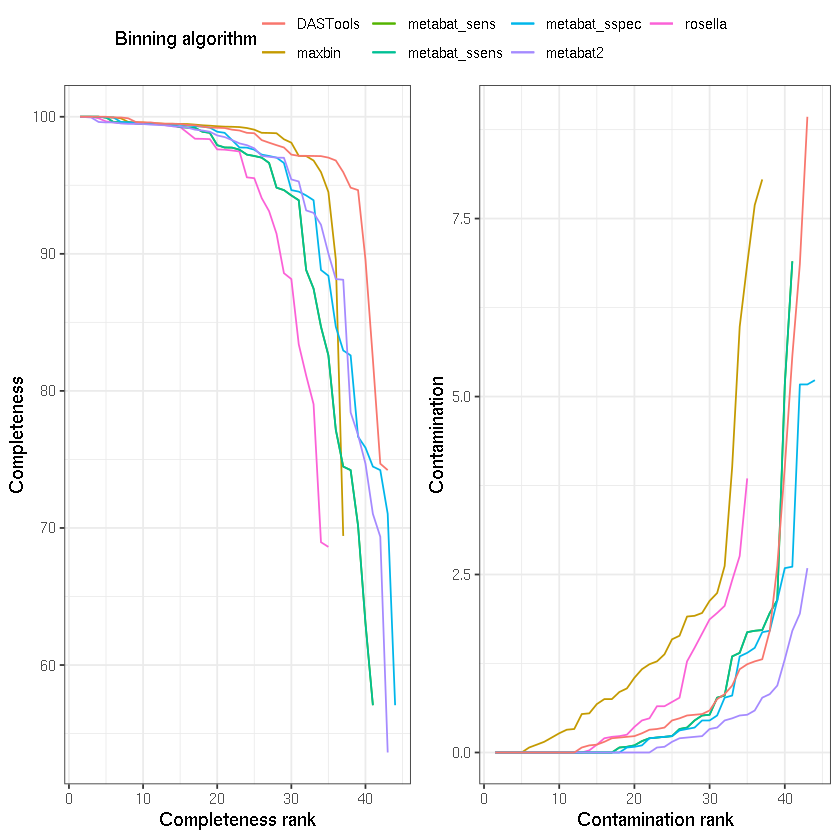

In [3]:
rosella_03[Completeness >= 90 & Contamination <= 5, .N]
rosella_03[Completeness >= 90 & Contamination <= 10, .N]
rosella_03[Completeness >= 70 & Contamination <= 10, .N]
rosella_03[Completeness >= 70, .N]
rosella_03[Completeness>=10,]

generate_ranks(all_bins_03, 'metabat2')
generate_ranks(all_bins_03, 'metabat_sens')
generate_ranks(all_bins_03, 'metabat_ssens')
generate_ranks(all_bins_03, 'metabat_sspec')
generate_ranks(all_bins_03, 'maxbin')
generate_ranks(rosella_03, 'rosella')
generate_ranks_das(das_tool_03, 'DASTools')

# all_bins_10[bin %like% "_sens" & Completeness >= 50 & Contamination <=10]
# all_bins_10[`Bin Id` %like% 'metabat_sens']
com_03 <- ggplot() + 
    geom_line(data=rosella_03[Completeness >= 50 & Contamination <=10], aes(x=com_rank, y=Completeness, color=binner)) + 
    geom_line(data=all_bins_03[Completeness >= 50 & Contamination <=10], aes(x=com_rank, y=Completeness, color=binner)) + 
    geom_line(data=das_tool_03[binner %like% 'DASTools' & Completeness >= 50 & Contamination <=10], aes(x=com_rank, y=Completeness, color=binner)) + 
    xlab("Completeness rank") + 
    labs(color="Binning algorithm")

con_03 <- ggplot() + 
    geom_line(data=rosella_03[Completeness >= 50 & Contamination <=10], aes(x=con_rank, y=Contamination, color=binner)) + 
    geom_line(data=all_bins_03[Completeness >= 50 & Contamination <=10], aes(x=con_rank, y=Contamination, color=binner)) + 
    geom_line(data=das_tool_03[binner %like% 'DASTools' & Completeness >= 50 & Contamination <=10], aes(x=con_rank, y=Contamination, color=binner)) + 
    xlab("Contamination rank") + 
    labs(color="Binning algorithm")

ggarrange(com_03, con_03, common.legend=TRUE)

[1] 26

[1] 28

[1] 35

[1] 36

Bin Id,Marker lineage,# genomes,# markers,# marker sets,0,1,2,3,4,5+,Completeness,Contamination,Strain heterogeneity
rosella_bin.1,g__Lactobacillus (UID380),58,449,129,4,444,1,0,0,0,98.83,0.39,0.00
rosella_bin.10,f__Pasteurellaceae (UID4932),83,767,440,109,656,2,0,0,0,84.53,0.28,100.00
rosella_bin.12,f__Pasteurellaceae (UID4932),83,767,440,1,712,53,1,0,0,99.89,7.26,12.50
rosella_bin.127,k__Bacteria (UID203),5449,103,57,94,9,0,0,0,0,15.79,0.00,0.00
rosella_bin.128,root (UID1),5656,56,24,53,3,0,0,0,0,12.50,0.00,0.00
rosella_bin.132,g__Rickettsia (UID3815),43,662,101,159,503,0,0,0,0,73.18,0.00,0.00
rosella_bin.134,f__Halobacteriaceae (UID96),40,417,263,308,109,0,0,0,0,26.18,0.00,0.00
rosella_bin.136,root (UID1),5656,56,24,53,3,0,0,0,0,12.50,0.00,0.00
rosella_bin.137,f__Halobacteriaceae (UID96),40,417,263,321,96,0,0,0,0,17.11,0.00,0.00
rosella_bin.138,g__Clostridium (UID1380),44,404,145,312,92,0,0,0,0,16.55,0.00,0.00


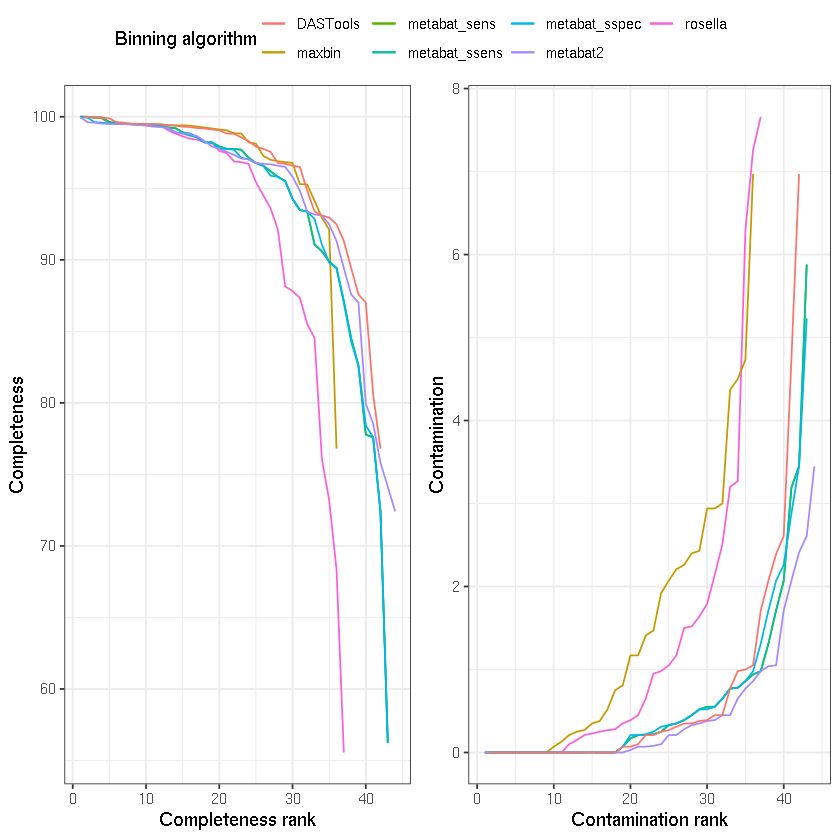

In [3]:
rosella_05[Completeness >= 90 & Contamination <= 5, .N]
rosella_05[Completeness >= 90 & Contamination <= 10, .N]
rosella_05[Completeness >= 70 & Contamination <= 10, .N]
rosella_05[Completeness >= 70, .N]
rosella_05[Completeness>=10,]

generate_ranks(all_bins_05, 'metabat2')
generate_ranks(all_bins_05, 'metabat_sens')
generate_ranks(all_bins_05, 'metabat_ssens')
generate_ranks(all_bins_05, 'metabat_sspec')
generate_ranks(all_bins_05, 'maxbin')
generate_ranks(rosella_05, 'rosella')
generate_ranks_das(das_tool_05, 'DASTools')

# all_bins_10[bin %like% "_sens" & Completeness >= 50 & Contamination <=10]
# all_bins_10[`Bin Id` %like% 'metabat_sens']
com_05 <- ggplot() + 
    geom_line(data=rosella_05[Completeness >= 50 & Contamination <=10], aes(x=com_rank, y=Completeness, color=binner)) + 
    geom_line(data=all_bins_05[Completeness >= 50 & Contamination <=10], aes(x=com_rank, y=Completeness, color=binner)) + 
    geom_line(data=das_tool_05[binner %like% 'DASTools' & Completeness >= 50 & Contamination <=10], aes(x=com_rank, y=Completeness, color=binner)) + 
    xlab("Completeness rank") + 
    labs(color="Binning algorithm")

con_05 <- ggplot() + 
    geom_line(data=rosella_05[Completeness >= 50 & Contamination <=10], aes(x=con_rank, y=Contamination, color=binner)) + 
    geom_line(data=all_bins_05[Completeness >= 50 & Contamination <=10], aes(x=con_rank, y=Contamination, color=binner)) + 
    geom_line(data=das_tool_05[binner %like% 'DASTools' & Completeness >= 50 & Contamination <=10], aes(x=con_rank, y=Contamination, color=binner)) + 
    xlab("Contamination rank") + 
    labs(color="Binning algorithm")

ggarrange(com_05, con_05, common.legend=TRUE)

[1] 41

[1] 43

[1] 45

[1] 46

[1] 45

[1] 78

Bin Id,Marker lineage,# genomes,# markers,# marker sets,0,1,2,3,4,5+,Completeness,Contamination,Strain heterogeneity
rosella_bin.1,f__Rhizobiaceae (UID3564),78,840,354,4,831,5,0,0,0,99.28,0.59,20.00
rosella_bin.10,g__Bacillus (UID864),93,711,241,4,706,1,0,0,0,98.55,0.21,0.00
rosella_bin.11,o__Rhodospirillales (UID3754),63,336,201,1,335,0,0,0,0,99.50,0.00,0.00
rosella_bin.12,f__Comamonadaceae (UID4119),39,693,323,40,652,1,0,0,0,92.32,0.15,0.00
rosella_bin.13,o__Burkholderiales (UID4000),193,426,213,32,393,1,0,0,0,98.70,0.05,100.00
rosella_bin.14,f__Enterobacteriaceae (UID5054),223,874,303,52,817,5,0,0,0,95.57,0.23,40.00
rosella_bin.15,f__Enterobacteriaceae (UID5054),223,860,300,5,853,2,0,0,0,99.06,0.25,0.00
rosella_bin.16,f__Brucellaceae (UID3482),94,1206,241,7,1196,3,0,0,0,99.49,0.45,0.00
rosella_bin.19,f__Enterobacteriaceae (UID5065),212,891,305,10,852,29,0,0,0,99.82,3.26,13.79
rosella_bin.2,g__Clostridium (UID1380),44,404,145,2,399,3,0,0,0,99.08,2.07,0.00


Warning message:
“Removed 40 rows containing missing values (geom_path).”Warning message:
“Removed 40 rows containing missing values (geom_path).”Warning message:
“Removed 40 rows containing missing values (geom_path).”

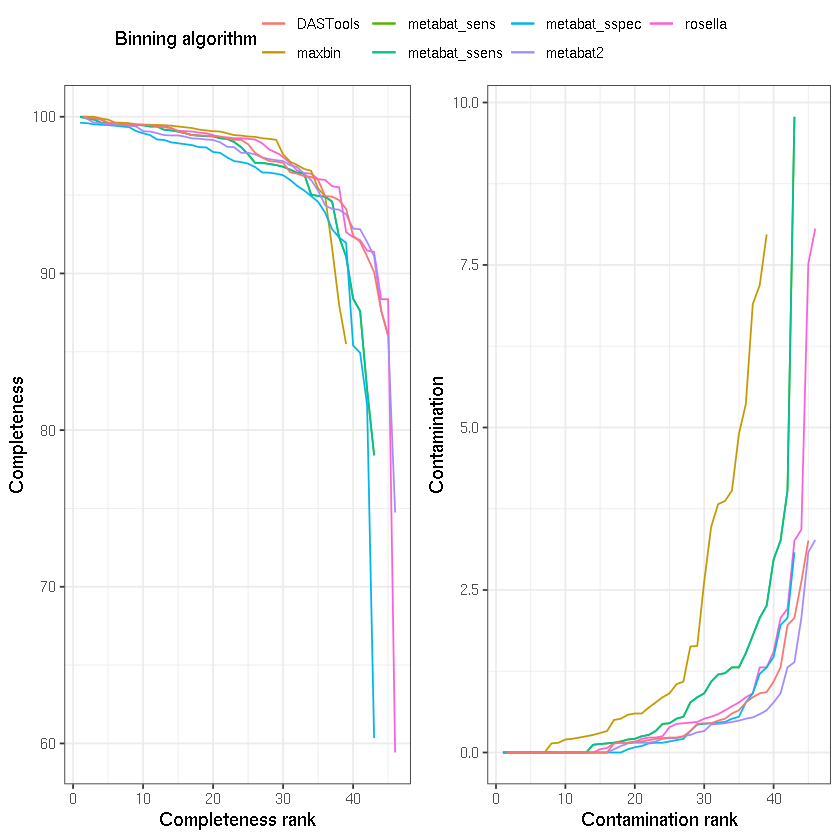

In [3]:
rosella_10[Completeness >= 90 & Contamination <= 5, .N]
rosella_10[Completeness >= 90 & Contamination <= 10, .N]
rosella_10[Completeness >= 70 & Contamination <= 10, .N]
rosella_10[Completeness >= 50 & Contamination <= 10, .N]
rosella_10[Completeness >= 70, .N]
rosella_10[, .N]
rosella_10[Completeness >= 50,]

generate_ranks(all_bins_10, 'metabat2')
generate_ranks(all_bins_10, 'metabat_sens')
generate_ranks(all_bins_10, 'metabat_ssens')
generate_ranks(all_bins_10, 'metabat_sspec')
generate_ranks(all_bins_10, 'maxbin')
generate_ranks(rosella_10, 'rosella')
generate_ranks_das(das_tool_10, 'DASTools')

# all_bins_10[bin %like% "_sens" & Completeness >= 50 & Contamination <=10]
# all_bins_10[`Bin Id` %like% 'metabat_sens']
com_10 <- ggplot() + 
    geom_line(data=rosella_10[Completeness >= 50 & Contamination <=10], aes(x=com_rank, y=Completeness, color=binner)) + 
    geom_line(data=all_bins_10[Completeness >= 50 & Contamination <=10], aes(x=com_rank, y=Completeness, color=binner)) + 
    geom_line(data=das_tool_10[binner %like% 'DASTools' & Completeness >= 50 & Contamination <=10], aes(x=com_rank, y=Completeness, color=binner)) + 
    xlab("Completeness rank") + 
    labs(color="Binning algorithm")

con_10 <- ggplot() + 
    geom_line(data=rosella_10[Completeness >= 50 & Contamination <=10], aes(x=con_rank, y=Contamination, color=binner)) + 
    geom_line(data=all_bins_10[Completeness >= 50 & Contamination <=10], aes(x=con_rank, y=Contamination, color=binner)) + 
    geom_line(data=das_tool_10[binner %like% 'DASTools' & Completeness >= 50 & Contamination <=10], aes(x=con_rank, y=Contamination, color=binner)) + 
    xlab("Contamination rank") + 
    labs(color="Binning algorithm")

ggarrange(com_10, con_10, common.legend=TRUE)

[1] 15

[1] 16

[1] 30

[1] 32

Bin Id,Marker lineage,# genomes,# markers,# marker sets,0,1,2,3,4,5+,Completeness,Contamination,Strain heterogeneity
rosella_bin.1,k__Bacteria (UID203),5449,103,57,63,40,0,0,0,0,58.21,0.00,0.00
rosella_bin.10,o__Lactobacillales (UID374),471,350,191,1,348,1,0,0,0,99.48,0.52,0.00
rosella_bin.14,k__Bacteria (UID203),5449,104,58,66,37,1,0,0,0,51.72,0.86,100.00
rosella_bin.15,g__Ensifer (UID3566),27,1025,322,404,610,11,0,0,0,56.88,1.03,72.73
rosella_bin.16,f__Enterobacteriaceae (UID5054),223,860,300,211,648,1,0,0,0,78.08,0.08,0.00
rosella_bin.18,f__Rhizobiaceae (UID3564),78,840,354,4,831,5,0,0,0,99.28,0.59,20.00
rosella_bin.2,f__Comamonadaceae (UID4119),39,693,323,67,624,2,0,0,0,87.53,0.31,50.00
rosella_bin.21,o__Lactobacillales (UID355),490,334,183,106,228,0,0,0,0,77.87,0.00,0.00
rosella_bin.22,f__Streptococcaceae (UID545),240,523,282,45,478,0,0,0,0,96.28,0.00,0.00
rosella_bin.23,k__Bacteria (UID203),5449,104,58,70,34,0,0,0,0,50.00,0.00,0.00


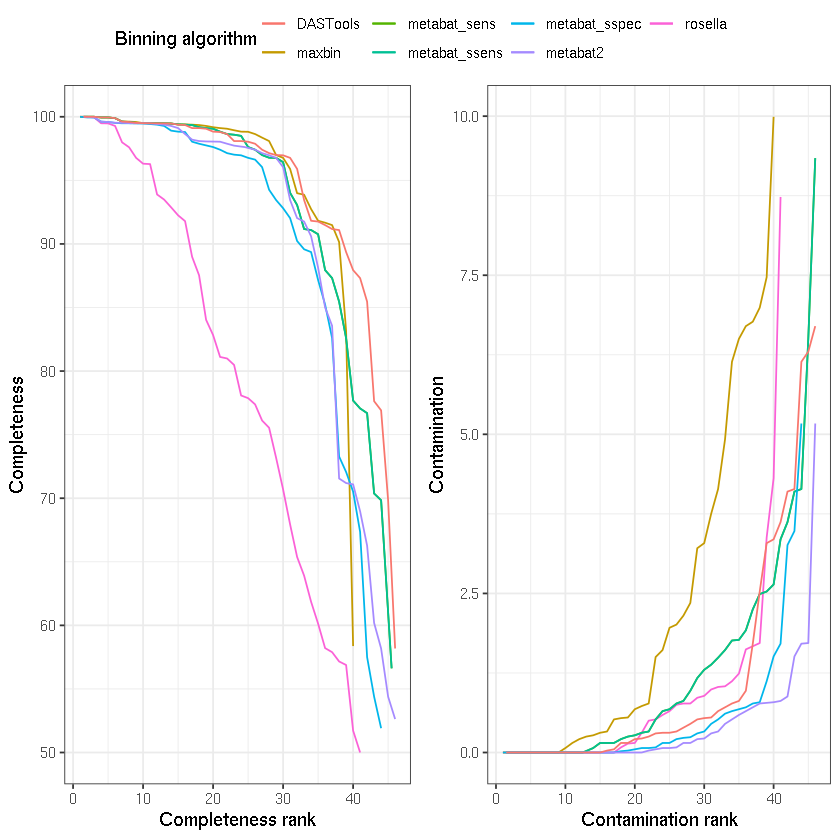

In [4]:
rosella_15[Completeness >= 90 & Contamination <= 5, .N]
rosella_15[Completeness >= 90 & Contamination <= 10, .N]
rosella_15[Completeness >= 70 & Contamination <= 10, .N]
rosella_15[Completeness >= 70, .N]
rosella_15[Completeness >= 50,]

generate_ranks(all_bins_15, 'metabat2')
generate_ranks(all_bins_15, 'metabat_sens')
generate_ranks(all_bins_15, 'metabat_ssens')
generate_ranks(all_bins_15, 'metabat_sspec')
generate_ranks(all_bins_15, 'maxbin')
generate_ranks(rosella_15, 'rosella')
generate_ranks_das(das_tool_15, 'DASTools')

# all_bins_10[bin %like% "_sens" & Completeness >= 50 & Contamination <=10]
# all_bins_10[`Bin Id` %like% 'metabat_sens']
com_15 <- ggplot() + 
    geom_line(data=rosella_15[Completeness >= 50 & Contamination <=10], aes(x=com_rank, y=Completeness, color=binner)) + 
    geom_line(data=all_bins_15[Completeness >= 50 & Contamination <=10], aes(x=com_rank, y=Completeness, color=binner)) + 
    geom_line(data=das_tool_15[binner %like% 'DASTools' & Completeness >= 50 & Contamination <=10], aes(x=com_rank, y=Completeness, color=binner)) + 
    xlab("Completeness rank") + 
    labs(color="Binning algorithm")

con_15 <- ggplot() + 
    geom_line(data=rosella_15[Completeness >= 50 & Contamination <=10], aes(x=con_rank, y=Contamination, color=binner)) + 
    geom_line(data=all_bins_15[Completeness >= 50 & Contamination <=10], aes(x=con_rank, y=Contamination, color=binner)) + 
    geom_line(data=das_tool_15[binner %like% 'DASTools' & Completeness >= 50 & Contamination <=10], aes(x=con_rank, y=Contamination, color=binner)) + 
    xlab("Contamination rank") + 
    labs(color="Binning algorithm")

ggarrange(com_15, con_15, common.legend=TRUE)